# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Attariq Muhammad Azhar
- **Email:** attariq03.azhar@gmail.com
- **ID Dicoding:** attariqazhar

## Menentukan Pertanyaan Bisnis

- Bagaimana tren peminjaman sepeda pada tahun 2011-2012?
- Bagaimana persebaran peminjaman sepeda di setiap jamnya?
- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
- Bagaimana persebaran peminjaman sepeda di setiap musimnya?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [2]:
# Import CSV
hour_df = pd.read_csv('data/hour.csv')
day_df = pd.read_csv('data/day.csv')

df = pd.merge(hour_df, day_df, on='dteday', how='inner', suffixes=('_hourly', '_daily'))

# Drop kolom berakhiran '_daily' kecuali 'cnt_daily' (hanya kolom 'cnt_caily' yang diperlukan pada day_df)
for column in df.columns:
    if '_daily' in column and column != 'cnt_daily':
        df = df.drop([column], axis=1)

# Melakukan penamaan ulang pada kolom berakhiran "_hourly"
for column in df.columns:
    if '_hourly' in column :
        df = df.rename(columns={column:column[:-7]})

# Memeriksa 5 baris pertama pada dataframe
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_daily
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,985


### Assessing Data

Mencari missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
 17  cnt_daily   17379 non-null  int64  
dtypes: float64(4), int64(13), object(1)
memory usage: 2.4+ MB


In [4]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
cnt_daily     0
dtype: int64

Mencari duplicate data

In [5]:
df.duplicated().sum()

0

Mencari outlier

In [6]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_daily
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,4533.692963
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,1917.376947
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,22.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,3214.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,4563.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,5986.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,8714.000000


Pada assesment tersebut, dapat disimpulkan bahwa tidak terdapat missing values, duplicate data, ataupun outlier     

### Cleaning Data

Karena data tidak memiliki missing values, duplicate data, ataupun outlier, proses cleaning data tidak perlu dilakukan lagi

## Exploratory Data Analysis (EDA)

Mengganti nilai di dalam kolom tahun

In [7]:
# Mengganti nilai pada kolom tahun (yr)
df['yr'] = df['yr'].replace([0,1], [2011, 2012])

# Mengganti nilai pada kolom musim (season)
df['season'] = df['season'].replace([1,2,3,4], ['Spring', 'Summer', 'Fall', 'Winter'])

# Mengganti nilai pada kolom cuaca (weathersit)
df['weathersit'] = df['weathersit'].replace([1,2,3,4], ['clear', 'cloudy', 'light rain', 'heavy rain'])

# Mengganti nilai pada kolom hari (weekday)
df['weekday'] = df['weekday'].replace([0,1,2,3,4,5,6], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Mengubah tipe data dteday
df['dteday'] = pd.to_datetime(df['dteday'])

# Memeriksa hasil replacement
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_daily
0,1,2011-01-01,Spring,2011,1,0,0,Saturday,0,clear,0.24,0.2879,0.81,0.0,3,13,16,985
1,2,2011-01-01,Spring,2011,1,1,0,Saturday,0,clear,0.22,0.2727,0.80,0.0,8,32,40,985
2,3,2011-01-01,Spring,2011,1,2,0,Saturday,0,clear,0.22,0.2727,0.80,0.0,5,27,32,985
3,4,2011-01-01,Spring,2011,1,3,0,Saturday,0,clear,0.24,0.2879,0.75,0.0,3,10,13,985
4,5,2011-01-01,Spring,2011,1,4,0,Saturday,0,clear,0.24,0.2879,0.75,0.0,0,1,1,985


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [9]:
df.describe()

,instant,dteday,yr,mnth,hr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,cnt_daily
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2011.502561,6.537775,11.546752,0.028770,0.682721,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,4533.692963
min,1.0000,2011-01-01 00:00:00,2011.000000,1.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,22.000000
25%,4345.5000,2011-07-04 00:00:00,2011.000000,4.000000,6.000000,0.000000,0.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,3214.000000
50%,8690.0000,2012-01-02 00:00:00,2012.000000,7.000000,12.000000,0.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,4563.000000
75%,13034.5000,2012-07-02 00:00:00,2012.000000,10.000000,18.000000,0.000000,1.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,5986.000000
max,17379.0000,2012-12-31 00:00:00,2012.000000,12.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,8714.000000
std,5017.0295,NaN,0.500008,3.438776,6.914405,0.167165,0.465431,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,1917.376947


### Explore

In [10]:
# Rata-rata peminjam di setiap hari
df.groupby('weekday')['cnt'].mean()

weekday
Friday       196.135907
Monday       183.744655
Saturday     190.209793
Sunday       177.468825
Thursday     196.436665
Tuesday      191.238891
Wednesday    191.130505
Name: cnt, dtype: float64

In [11]:
# Rata-rata peminjam di setiap jam
df.groupby('hr')['cnt'].mean()

hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64

In [12]:
# Jumlah peminjam sepeda setiap bulan pada tahun 2011-2012
df.groupby(['yr', 'mnth'])['cnt'].sum()

yr    mnth
2011  1        38189
      2        48215
      3        64045
      4        94870
      5       135821
      6       143512
      7       141341
      8       136691
      9       127418
      10      123511
      11      102167
      12       87323
2012  1        96744
      2       103137
      3       164875
      4       174224
      5       195865
      6       202830
      7       203607
      8       214503
      9       218573
      10      198841
      11      152664
      12      123713
Name: cnt, dtype: int64

In [13]:
# Rata-rata peminjam sepeda setiap musim di tahun 2011-2012
df.groupby('season')['cnt'].mean()

season
Fall      236.016237
Spring    111.114569
Summer    208.344069
Winter    198.868856
Name: cnt, dtype: float64

In [14]:
# Rata-rata peminjam sepeda berdasarkan cuaca
df.groupby('weathersit')['cnt'].mean()

weathersit
clear         204.869272
cloudy        175.165493
heavy rain     74.333333
light rain    111.579281
Name: cnt, dtype: float64

## Visualization & Explanatory Analysis

### Bagaimana tren peminjaman sepeda pada tahun 2011-2012?


/Users/retaconsulting/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/retaconsulting/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


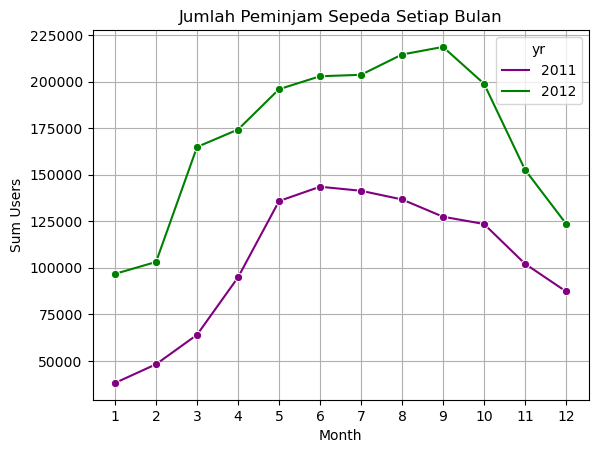

In [15]:
# Menerapkan plot dengan jenis line chart
sns.lineplot(data=df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index(), x="mnth", y="cnt", hue="yr", errorbar=None, marker="o", palette=['purple', 'green'])

# Memberi ticks pada sumbu x sesuai urutan bulan
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])

# Memberi label pada sumbu x dan y
plt.xlabel('Month')
plt.ylabel('Sum Users')

# Memberi judul pada plot
plt.title('Jumlah Peminjam Sepeda Setiap Bulan')

# Menerapkan grid pada plot
plt.grid()

plt.show()

### Kapan sepeda paling sering dipinjam di setiap harinya?

/Users/retaconsulting/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/retaconsulting/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


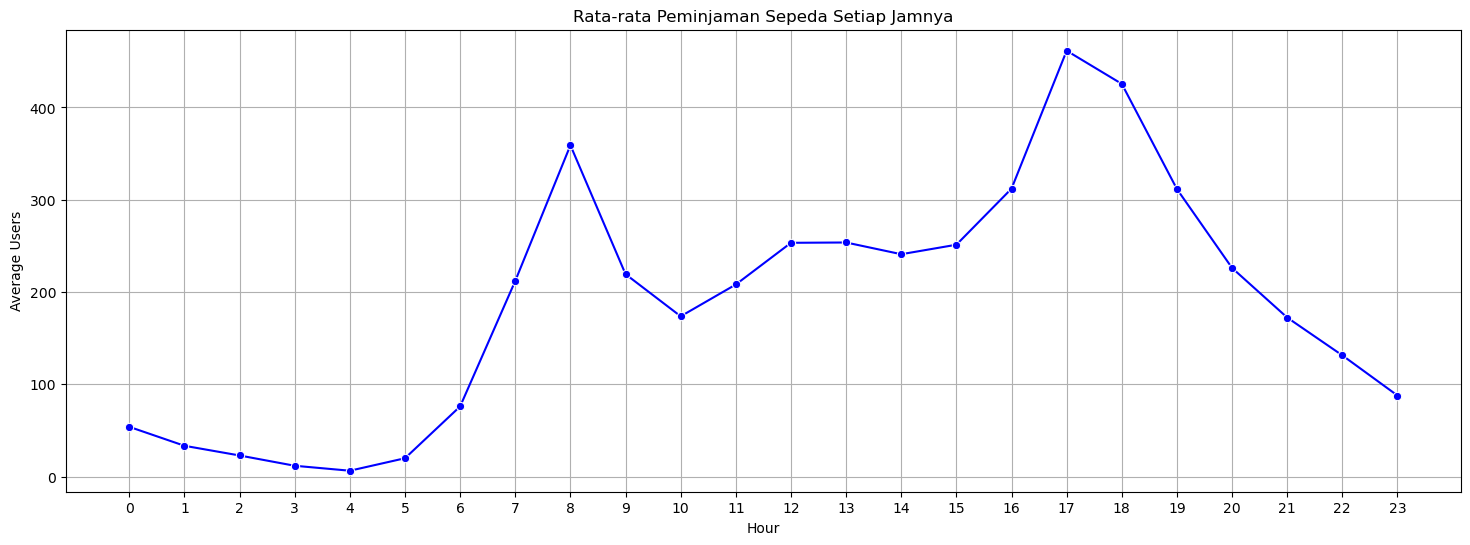

In [16]:
# Membuat dataframe rata-rata peminjaman sepeda setiap jamnya
df_mean_hourly = df.groupby('hr')['cnt'].mean().reset_index()

# Membuat plot dengan jenis line chart
plt.figure(figsize = (18,6))
ax = sns.lineplot(data=df.groupby('hr')['cnt'].mean().reset_index(), x="hr", y="cnt", color='blue', errorbar=None, marker="o",)

# Memberi judul, label, serta ticks
plt.xlabel("Hour")
plt.ylabel("Average Users")
plt.title("Rata-rata Peminjaman Sepeda Setiap Jamnya")
plt.xticks([i for i in range(24)])

# Menerapkan grid pada plot
plt.grid()

plt.show()

### Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?

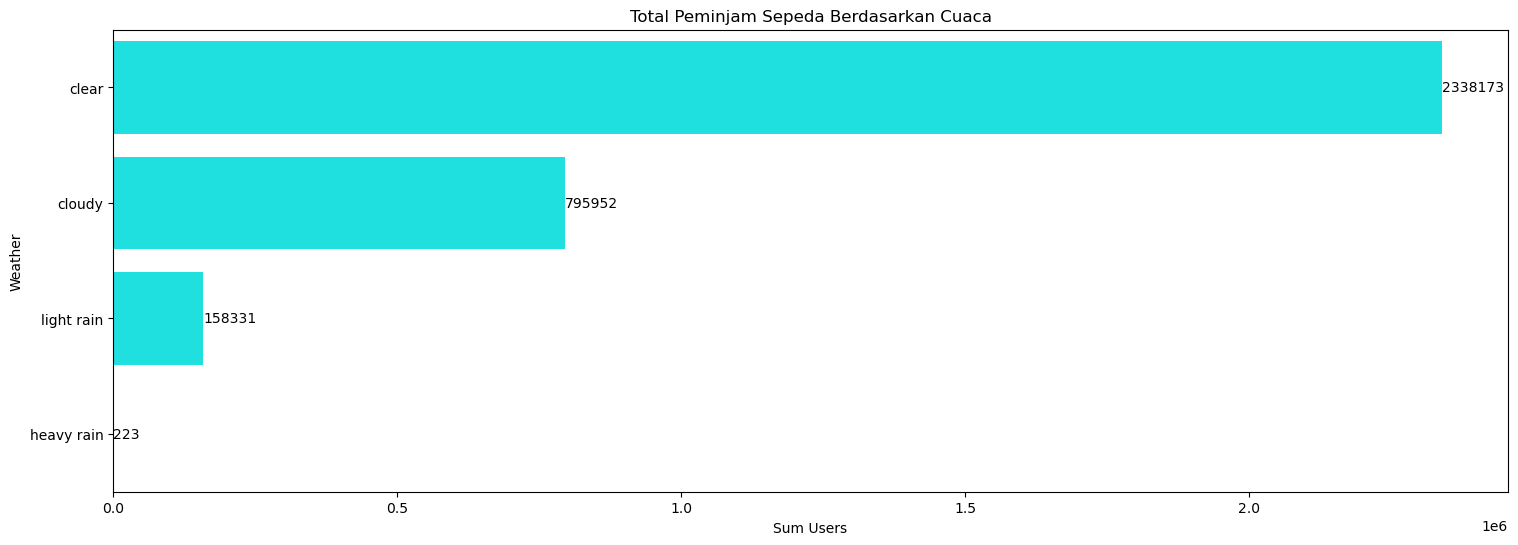

In [17]:
# Membuat dataframe yang menyimpan informasi jumlah peminjam sepeda pada setiap cuaca
df_weather = df.groupby('weathersit')['cnt'].sum().reset_index().sort_values('cnt', ascending=False, ignore_index=True)

# Menerapkan ukuran figure untuk plot
plt.figure(figsize=(18, 6))

# Menerapkan plotting dengan tipe bar plot
sns.barplot(data=df_weather, y="weathersit", x="cnt", errorbar=None, color="cyan")

# Menyimpan informasi detail mengenai jumlah peminjam di samping bar
for index, row in df_weather.iterrows():
  plt.text(row['cnt'], index, str(row['cnt']), ha='left', va='center')

# Memberi judul
plt.title('Total Peminjam Sepeda Berdasarkan Cuaca')

# Memberi label pada sumbu x dan y
plt.xlabel('Sum Users')
plt.ylabel('Weather')

plt.show()

### Bagaimana persebaran peminjaman sepeda di setiap musimnya?

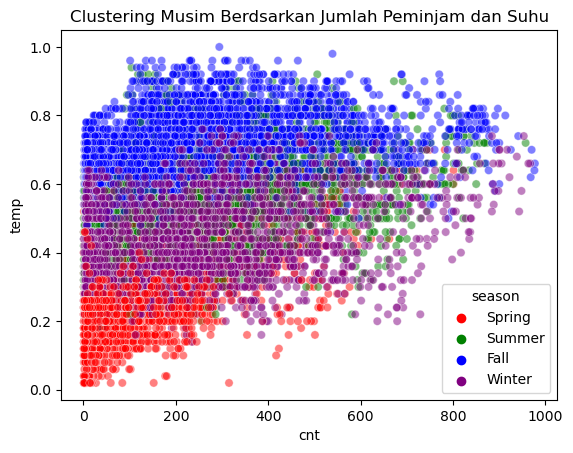

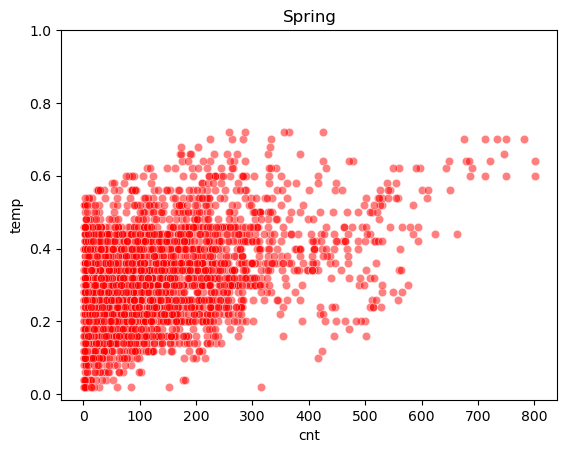

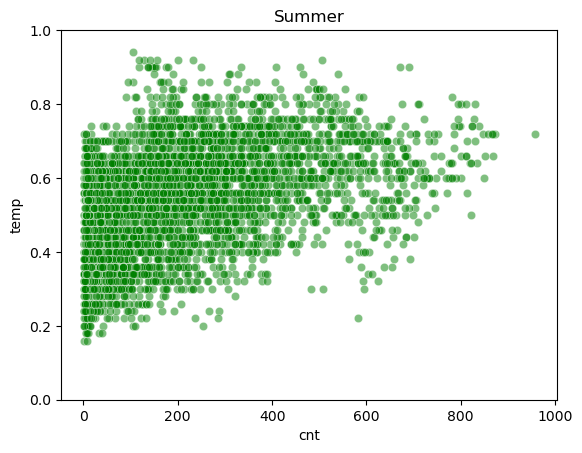

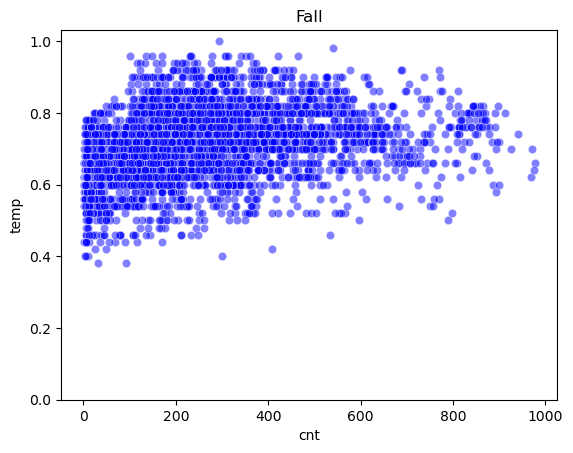

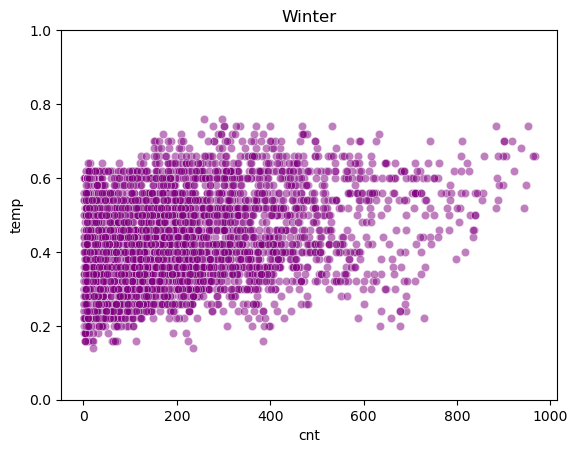

In [18]:
seasons = ['Spring', 'Summer', 'Fall','Winter']
palette=['red','green','blue','purple']

# Membuat scatter plot antara jumlah peminjaman sepeda dengan suhu dengan clustering musim
sns.scatterplot(data=df, x='cnt', y='temp', hue="season", alpha=0.5, palette=palette)

# Memberikan ticks dan judul pada plot
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
plt.title("Clustering Musim Berdsarkan Jumlah Peminjam dan Suhu")

plt.show()

# Membuat scatter plot untuk setiap musimnya
for i in range(4):
    sns.scatterplot(data=df[df['season']==seasons[i]], x='cnt', y='temp', alpha=0.5, color=palette[i], hue_norm=(0,1))
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(seasons[i])
    plt.show()

## Conclusion

- Conclution pertanyaan 1
### Jumlah peminjam sepeda cenderung memiliki kenaikan pada tahun 2012 dibanding tahun 2011. Pada bulan yang sama, jumlah peminjam sepeda pada tahun 2012 lebih tinggi dibanding jumlah peminjam sepeda pada tahun 2011.


- Conclution pertanyaan 2
### Sepeda paling sering dipinjam pada pukul 17.00, diikuti oleh pukul 18.00 dan pukul 8.00. Apabila ditelaah lebih dalam, waktu-waktu tersebut merupakan waktu puncak di mana orang-orang pulang dan pergi bekerja sehingga peminjaman sepeda cenderung lebih banyak.

- Conclution pertanyaan 3
### Peminjaman sepeda banyak dilakukan saat cuaca cerah (clear) sehingga dapat dikatakan orang-orang lebih sering bersepeda pada saat cuaca sedang cerah

- Conclution pertanyaan 4
### Pada saat musim panas (Summer) dan gugur (Fall), suhu udara akan cukup hangat sehingga orang-orang cenderung lebih banyak menggunakan sepeda untuk aktivitas di luar ruangan. Sebagai hasilnya, tingkat peminjaman sepeda cenderung meningkat selama musim panas dan gugur.

In [19]:
# Menyimpan dataframe pada file CSV baru
df.to_csv('dashboard/cleaned_bike_sharing.csv', index=False)